In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
import xlsxwriter
import os

In [37]:
stock = 'AAL'

In [38]:
xls = pd.ExcelFile('./$'+stock+'.xlsx')
all_data = pd.read_excel(xls, header = 0,encoding='latin-1')

In [39]:
all_data = all_data[np.isfinite(all_data['Predicted_change_stock'])]
all_data = all_data[np.isfinite(all_data['Buy/Sell'])]

In [40]:
all_data.describe()

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
count,51.000000,51.000000,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,35.219412,35.070000,9.731227e+06,33.899230,-0.447087,0.022178,3904.050110,0.216248,0.055417,0.797633,0.146951,386.850533,0.035093,-0.488144,-0.243243
std,3.513782,3.492759,3.143877e+06,3.327322,1.512450,0.860596,5175.750687,0.129932,0.028120,0.036954,0.040523,1785.359905,0.091549,1.581633,0.976586
min,30.770000,30.809999,5.018200e+06,29.919750,-5.089362,-2.619312,79.500000,-0.234000,0.000000,0.675000,0.000000,-9692.211305,-0.481739,-5.089362,-1.000000
25%,32.250000,32.135000,7.338450e+06,31.002536,-1.211461,-0.412757,1758.203125,0.130223,0.037247,0.780454,0.122131,88.763190,0.019808,-1.211461,-1.000000
50%,33.279999,33.209999,9.032517e+06,32.129019,-0.418915,0.038208,2510.800000,0.219553,0.054633,0.798029,0.138038,435.411436,0.037583,-0.418915,-1.000000
75%,38.745001,38.615000,1.160547e+07,37.335455,0.482330,0.551023,4064.875225,0.285560,0.072450,0.817630,0.170564,962.676211,0.064620,0.482330,1.000000
max,41.360001,41.340000,2.093950e+07,40.029770,3.565896,2.305596,38754.936508,0.646040,0.133545,0.888500,0.281500,4079.469863,0.224442,3.565896,1.000000


C:\Users\shima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Compound_multiplied_scaled')

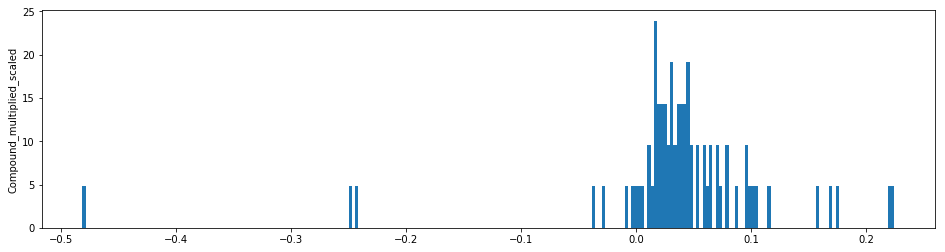

In [41]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
x = all_data['Compound_multiplied_scaled'] 
plt.hist(x, normed=True, bins=250)
plt.ylabel('Compound_multiplied_scaled')

In [42]:
x = np.array(all_data[['Compound_multiplied_scaled']]) #
y = np.array(all_data['Buy/Sell'])

# from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### KNN

In [43]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 
neigh.score( x_test, y_test)

0.5333333333333333

In [44]:
neigh_cv = cross_val_score(neigh, x_train, y_train, cv=10) 
neigh_cv.mean()

0.5919047619047617

### Logistic

In [45]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
logreg.score( x_test, y_test)

0.6

In [46]:
logreg_cv = cross_val_score(logreg, x_train, y_train, cv=10)
logreg_cv.mean()

0.6276190476190475

### SVM

In [47]:
svm_linear = SVC( kernel = 'linear')
svm_linear.fit(x_train, y_train)
svm_linear.score(x_test, y_test)

0.6

In [48]:
svm_linear_cv = cross_val_score(svm_linear, x_train, y_train, cv=10)
svm_linear_cv.mean()

0.6276190476190475

### 朴素贝叶斯

In [49]:
scaler = MinMaxScaler() 
X_minmax = scaler.fit_transform(x_train)

mnb = MultinomialNB()

In [50]:
mnb_cv = cross_val_score(mnb, X_minmax, y_train, cv=10) # uscaled data accuracy same;  6588046192259676
mnb_cv.mean()

0.6276190476190475

### 决策树

In [51]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train) 
dtc.score(x_test, y_test)

0.4666666666666667

In [52]:
dtc_cv = cross_val_score(dtc, x_train, y_train, cv=10) 
print(dtc_cv.mean())

0.5752380952380952


In [18]:
'''
features = ['Buy/Sell']
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 
'''

"\nfeatures = ['Buy/Sell']\ndot_data = StringIO()  \ntree.export_graphviz(dtc, out_file=dot_data,  \n                         feature_names=features)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \nImage(graph.create_png()) \n"

### 随机森林

In [53]:
forest_reg = RandomForestClassifier(random_state=42)
forest_reg.fit(x_train, y_train)
forest_reg.score(x_test, y_test)

0.4666666666666667

In [54]:
forest_reg_cv = cross_val_score(forest_reg, x_train, y_train, cv=10) 
forest_reg_cv.mean()

0.5942857142857143

### 神经网络 （参数待调，极为糟糕）

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import regularizers
from keras.optimizers import SGD
from keras.models import load_model

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(Dense(32,input_dim=1)) #建立输入层，一维数据
model.add(Activation('relu')) #激活函数采用ReLU
model.add(Dense(32)) #第二层32个单元，对系数b进行正则化
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))   #输出层
model.add(Activation('sigmoid'))
sgd = SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)    #采用随机梯度下降参数
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train,nb_epoch=1000,batch_size=5)

C:\Users\shima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1000
59/59 [==============================] - 0s 3ms/step - loss: 0.4623 - acc: 0.0000e+00
Epoch 2/1000
59/59 [==============================] - 0s 169us/step - loss: -0.2485 - acc: 0.0000e+00
Epoch 3/1000
59/59 [==============================] - 0s 135us/step - loss: -1.1417 - acc: 0.0000e+00
Epoch 4/1000
59/59 [==============================] - 0s 152us/step - loss: -3.5978 - acc: 0.0000e+00
Epoch 5/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 6/1000
59/59 [==============================] - 0s 153us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 7/1000
59/59 [==============================] - 0s 168us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 8/1000
59/59 [==============================] - 0s 169us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 9/1000
59/59 [==============================] - 0s 169us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 10/1000
59/59 [==============================] - 0s 183us/step - loss: -4.0978 

59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 160/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 161/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 162/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 163/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 164/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 165/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 166/1000
59/59 [==============================] - 0s 129us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 167/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 168/1000
59/59 [==============================] - 0s 135us/step - loss: -

59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 316/1000
59/59 [==============================] - 0s 145us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 317/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 318/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 319/1000
59/59 [==============================] - 0s 169us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 320/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 321/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 322/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 323/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 324/1000
59/59 [==============================] - 0s 152us/step - loss: -

59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 472/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 473/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 474/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 475/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 476/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 477/1000
59/59 [==============================] - 0s 136us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 478/1000
59/59 [==============================] - 0s 134us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 479/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 480/1000
59/59 [==============================] - 0s 135us/step - loss: -

59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 628/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 629/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 630/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 631/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 632/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 633/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 634/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 635/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 636/1000
59/59 [==============================] - 0s 135us/step - loss: -

59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 784/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 785/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 786/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 787/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 788/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 789/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 790/1000
59/59 [==============================] - 0s 152us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 791/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 792/1000
59/59 [==============================] - 0s 135us/step - loss: -

59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 940/1000
59/59 [==============================] - 0s 116us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 941/1000
59/59 [==============================] - 0s 118us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 942/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 943/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 944/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 945/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 946/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 947/1000
59/59 [==============================] - 0s 135us/step - loss: -4.0978 - acc: 0.0000e+00
Epoch 948/1000
59/59 [==============================] - 0s 135us/step - loss: -

In [31]:
model.evaluate(x_test, y_test, verbose=0)

[-3.223618984222412, 0.0]

## Summary

In [55]:
print("KNN: \t\t\t", neigh_cv.mean())
print("Logistic Regression: \t", logreg_cv.mean())
print("SVM linear: \t\t", svm_linear_cv.mean())
print("Naive Bayes: \t\t", mnb_cv.mean())
print("Decision Tree: \t\t", dtc_cv.mean())
print("Random Forest: \t\t", forest_reg_cv.mean())

KNN: 			 0.5919047619047617
Logistic Regression: 	 0.6276190476190475
SVM linear: 		 0.6276190476190475
Naive Bayes: 		 0.6276190476190475
Decision Tree: 		 0.5752380952380952
Random Forest: 		 0.5942857142857143


In [56]:
results = []
cv = [neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(),mnb_cv.mean(),dtc_cv.mean(), forest_reg_cv.mean()]
results.append(cv)
results = {'0': ['KNN', 'LogReg', 'SVM linear', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
          '1':[neigh_cv.mean(), logreg_cv.mean(), svm_linear_cv.mean(), mnb_cv.mean(),dtc_cv.mean(),forest_reg_cv.mean()]}
summary = pd.DataFrame.from_dict(results)
summary = summary.transpose()
summary = summary.rename(index = {'0':'Model', '1':stock})
summary

,0,1,2,3,4,5
Model,KNN,LogReg,SVM linear,Naive Bayes,Decision Tree,Random Forest
AAL,0.591905,0.627619,0.627619,0.627619,0.575238,0.594286


In [34]:
writer_df = pd.ExcelWriter('summary.xlsx', engine='xlsxwriter')
summary.to_excel(writer_df)
writer_df.save()
os.rename('summary.xlsx', stock+'_summary.xlsx')

In [57]:
all_data

,Open,Close,Volume_stock,Adj_Close_stock,Pct_change_stock,Pct_change_stock_scaled,Followers,compound,neg,neu,pos,Compound_multiplied,Compound_multiplied_scaled,Predicted_change_stock,Buy/Sell
2016-04-01,40.130001,39.520000,1.124410e+07,38.267448,-1.520061,-0.588352,3840.046512,0.214360,0.058302,0.805488,0.136233,721.391419,0.052247,-1.381793,-1.0
2016-04-02,NaN,NaN,1.010647e+07,38.219032,-1.381793,-0.509677,13116.086957,0.270387,0.047174,0.815957,0.136913,2799.273065,0.158797,-1.243524,-1.0
2016-04-03,NaN,NaN,8.968833e+06,38.170616,-1.243524,-0.431001,8120.142857,0.442921,0.008786,0.825786,0.165429,4022.892986,0.221541,-1.105256,-1.0
2016-04-04,39.810001,39.369999,7.831200e+06,38.122200,-1.105256,-0.352325,5260.681818,0.097152,0.067614,0.798818,0.133591,1935.749030,0.114517,-0.511119,-1.0
2016-04-05,39.130001,38.930000,7.648400e+06,37.696152,-0.511119,-0.014256,1824.033333,0.138490,0.061833,0.800000,0.138167,312.512317,0.031281,-0.435112,-1.0
2016-04-06,39.070000,38.900002,5.645500e+06,37.667107,-0.435112,0.028992,1001.096774,0.146600,0.072548,0.802484,0.124968,184.894384,0.024737,-0.775994,-1.0
2016-04-07,38.660000,38.360001,8.206700e+06,37.144211,-0.775994,-0.164972,1965.640000,0.233180,0.037080,0.829000,0.133920,579.967564,0.044996,-0.516798,-1.0
2016-04-08,38.700001,38.500000,6.087400e+06,37.279778,-0.516798,-0.017488,329.100000,0.305595,0.027600,0.792650,0.179750,120.605470,0.021441,-0.396093,-1.0
2016-04-09,NaN,NaN,6.702367e+06,37.354014,-0.396093,0.051194,4800.000000,0.370489,0.035889,0.757000,0.207111,2977.948000,0.167959,-0.275388,-1.0
2016-04-10,NaN,NaN,7.317333e+06,37.428251,-0.275388,0.119876,3688.437500,0.276431,0.036687,0.818188,0.145125,875.068981,0.060128,-0.154683,-1.0


In [ ]:
all_data["Gain_or_Loss_KNN"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['KNN_prediction']
all_data["Gain_or_Loss_LogReg"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['LogReg_prediction']
all_data["Gain_or_Loss_SVM"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['SVM_prediction']
all_data["Gain_or_Loss_NaiveBayes"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['Naive_Bayes_prediction']
all_data["Gain_or_Loss_DecisionTree"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['Decision_Tree_prediction']
all_data["Gain_or_Loss_RandomForest"] = (all_data['Adj_Close_stock'] - all_data['Open'])*all_data['Random_Forest_prediction']

Spring2019.head()